In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [53]:
df=pd.read_csv('C:/Users/ankush.parkhad/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/census_income.csv')

In [54]:
#checking first five rows
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [55]:
#checking bottom five rows
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [56]:
#checking random 3 rows
df.sample(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
27255,18,Private,157131,12th,8,Never-married,Sales,Own-child,White,Female,0,0,8,United-States,<=50K
28031,20,Private,157595,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
8316,17,Private,208463,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K


In [57]:
df.shape

(32560, 15)

Dataset has 32560 rows and 15 columns

In [58]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000




The max age is 90 years while the min age is 17 years.


In [59]:
#checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in our dataframe

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As we have to predict whether a person makes over a 50k over a year or not so lets first check how many people are earning more than $50k and how many less than 50k

In [61]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

24719 people are earning less than or equal to 50k while only 7841 people are earning more than 50k

In [62]:
#Now lets check it genderwise
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

More numbers of male are present while female numbers are less

In [63]:
#Now lets check country wise
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Max number of people belongs to United States

In [64]:
#Now lets check occupation wise
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [65]:
df.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
11034,38,Private,112093,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
11965,55,Private,83401,5th-6th,3,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
21151,44,?,191982,Some-college,10,Divorced,?,Unmarried,White,Female,0,0,10,Poland,<=50K
11740,37,Private,200374,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,1902,40,United-States,>50K
26654,38,Private,52738,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


As we can see we have Education and Education_num two columns, both indicating the same thing so lets drop the 'Education' column as we have Education_num there.

In [66]:
df_new=df.drop(['Education'], axis=1)
df_new

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Education column has been dropped

In [67]:
df=df_new

In [68]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


As we can see 'Fnlwgt' column has very discrete data and i dont know what is this column used for so lets drop this also.

In [69]:
df=df.drop(['Fnlwgt'], axis=1)

In [70]:
df.sample(3)

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
29992,25,Private,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15358,48,Private,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,44,United-States,<=50K
19765,20,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


"Fnlwgt" column has been dropped

## Label Encoding

In [71]:
le=LabelEncoder()

df['Workclass']=le.fit_transform(df['Workclass'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Income']=le.fit_transform(df['Income'])

In [72]:
df.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,13,2,4,0,4,1,0,0,13,39,0
1,38,4,9,0,6,1,4,1,0,0,40,39,0
2,53,4,7,2,6,0,2,1,0,0,40,39,0
3,28,4,13,2,10,5,2,0,0,0,40,5,0
4,37,4,14,2,4,5,4,0,0,0,40,39,0


All string data has now changed into categorical data

<AxesSubplot:xlabel='Income', ylabel='Age'>

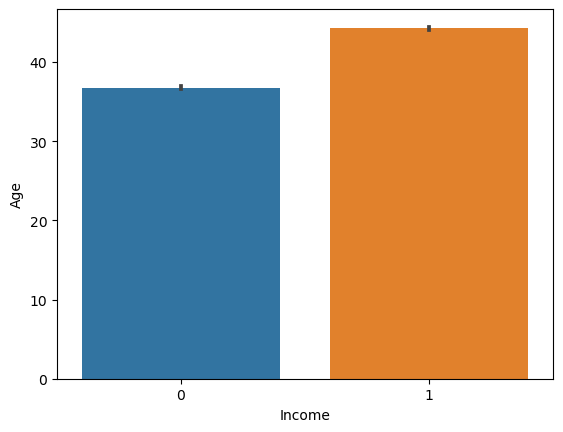

In [73]:
sns.barplot(x='Income', y='Age', data=df)

While label Encoding '0' is assigned to people earning less than 50k whil 1 assigned to people earning more than 50K. So here we can see people haivng higher age is earning more and people with lower age is earning less

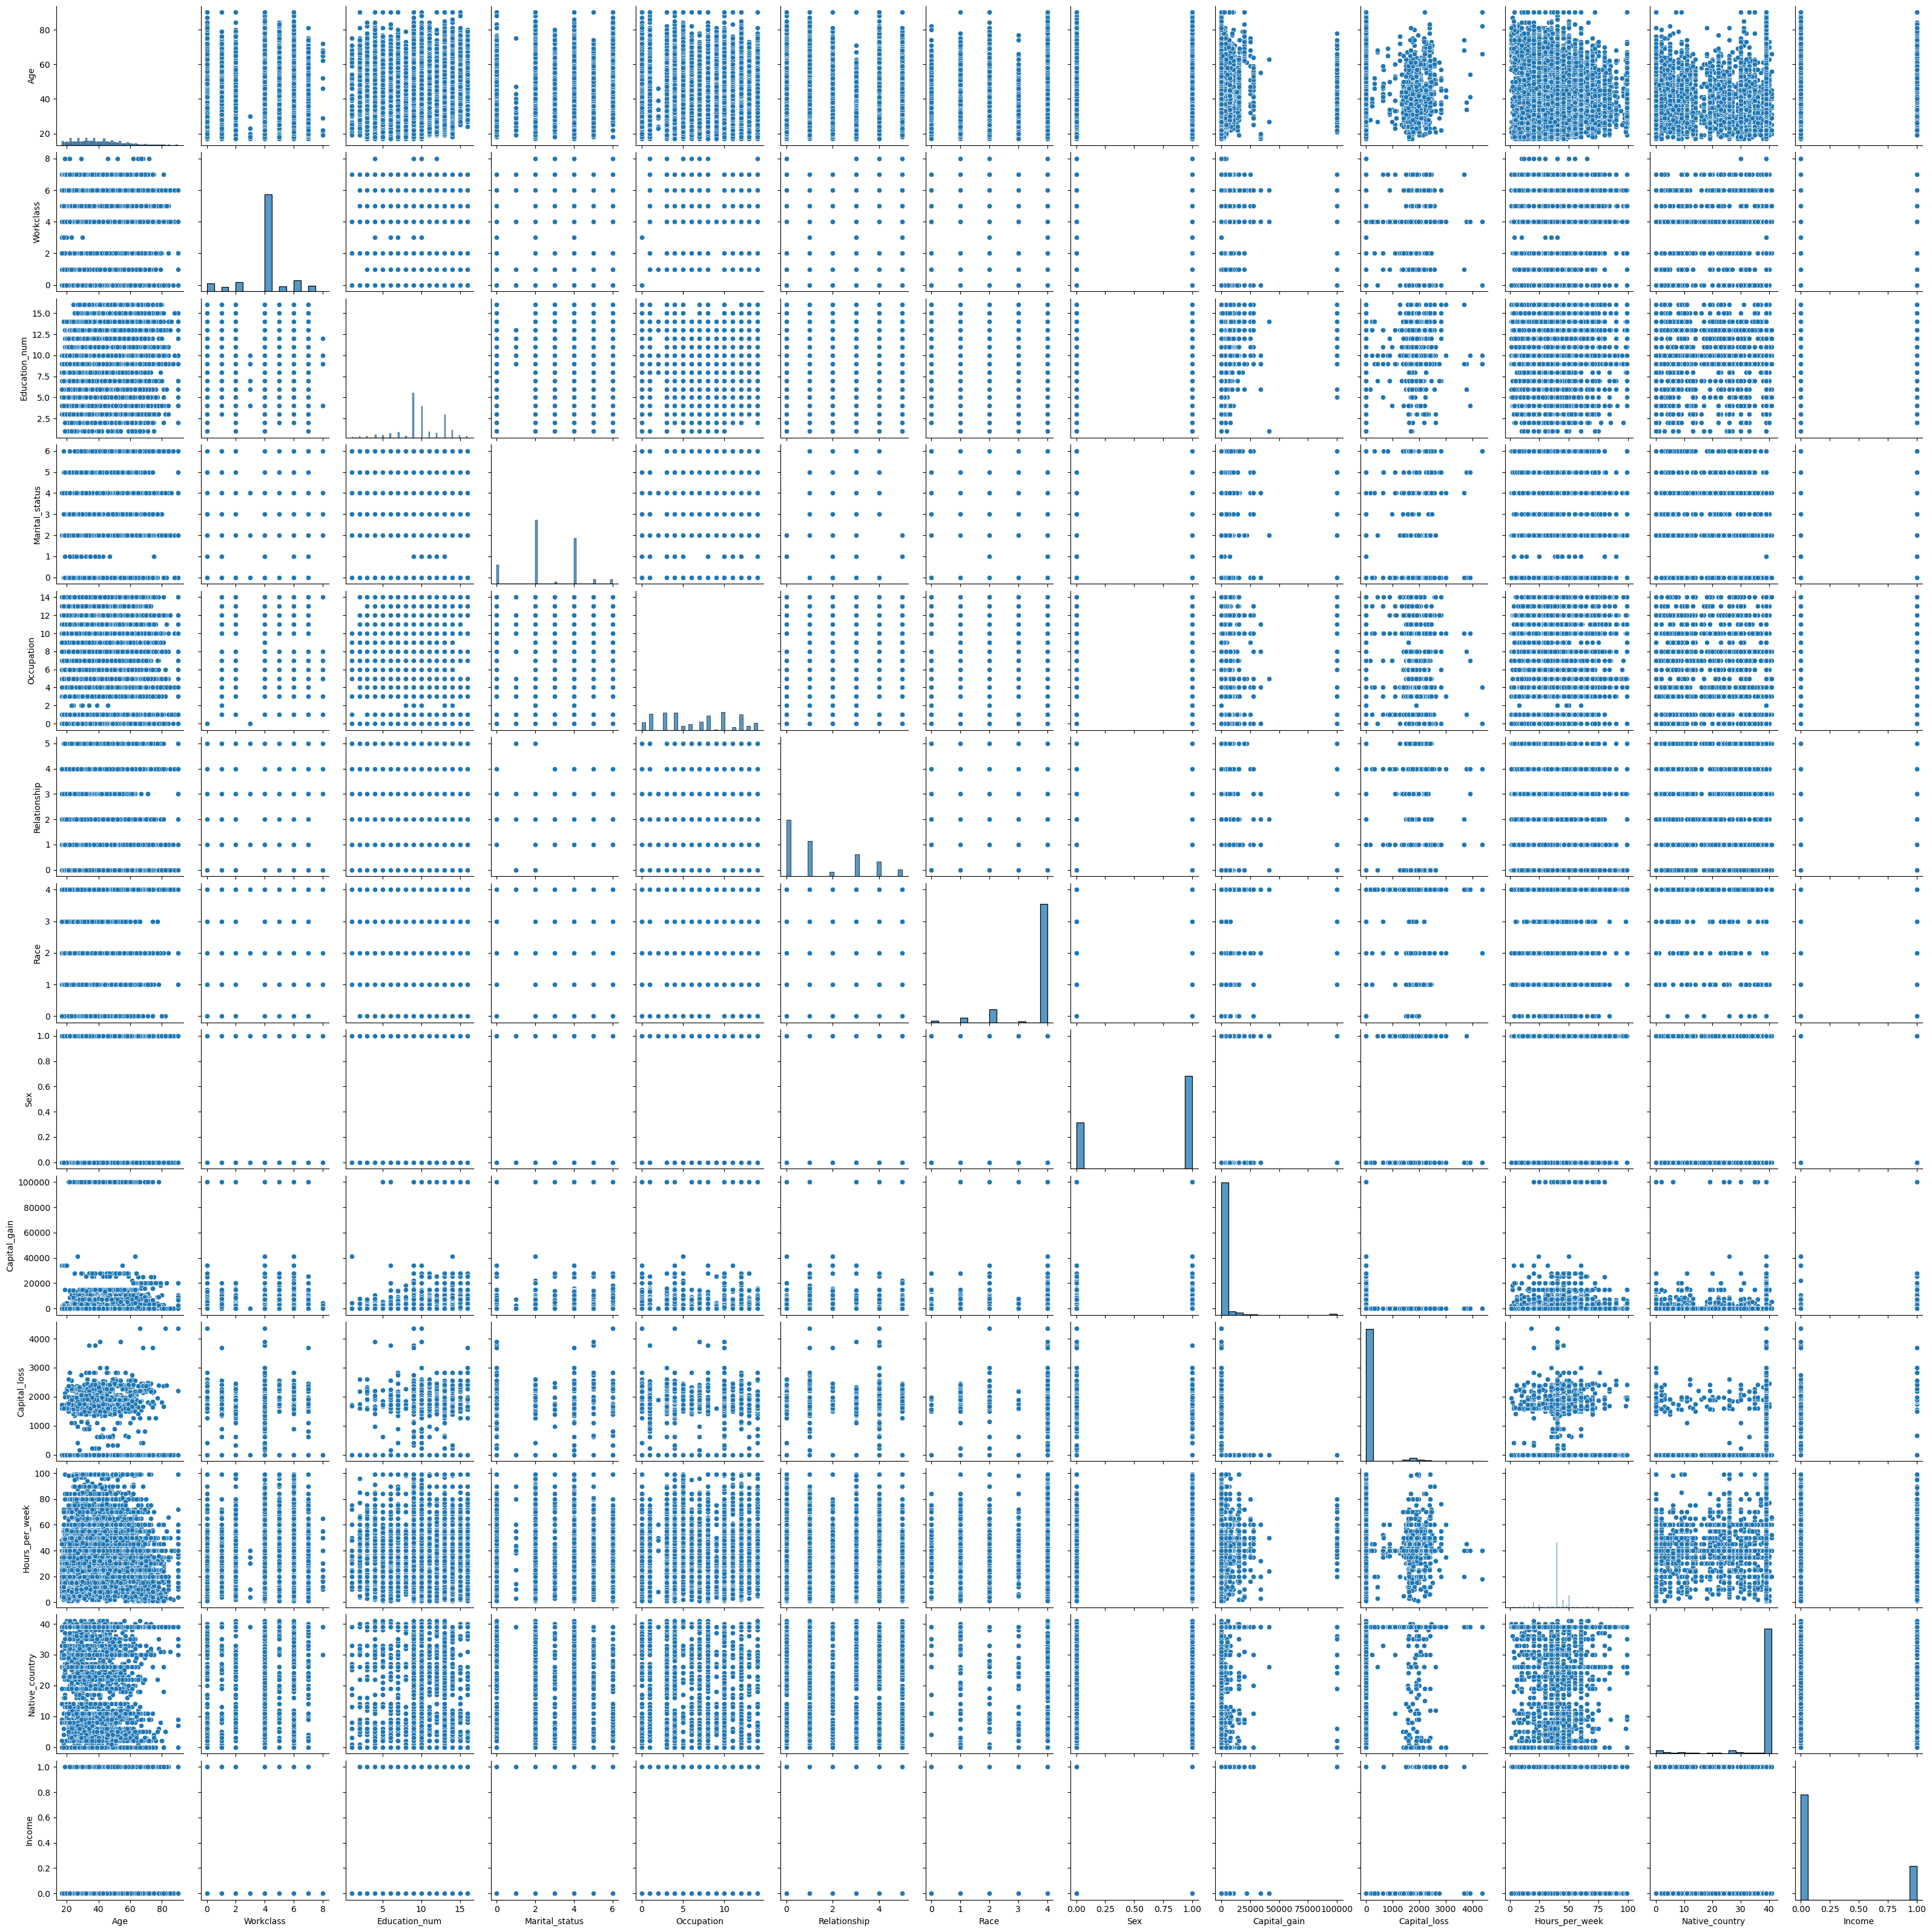

In [74]:
sns.pairplot(df)

<AxesSubplot:>

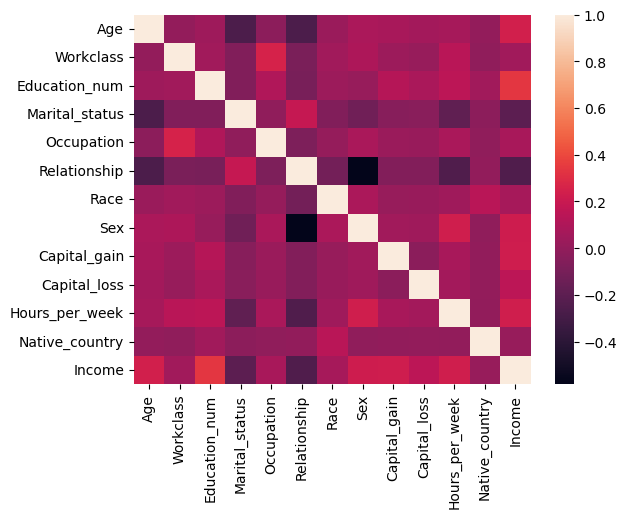

In [75]:
sns.heatmap(df.corr())

Observations:

1.Relation b/w Income and Education is very high

2.Relationship and Marital status is not that much corelated to income

In [76]:
x=df.drop(['Income'], axis=1)
y=df['Income']

## train Test split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [78]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [80]:
#printing metrics
y_pred=gb.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4948
           1       0.64      0.30      0.41      1564

    accuracy                           0.79      6512
   macro avg       0.72      0.62      0.64      6512
weighted avg       0.77      0.79      0.76      6512

[[4675  273]
 [1088  476]]
0.7910012285012284
